<a href="https://colab.research.google.com/github/BYADAMREDDY/HDS-Capstone/blob/main/src/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

We will begin by consolidating the data into a single, reusable dataset. To do this, we first need to identify and select the relevant columns. Understanding the purpose of each column is essential, and for that, we refer to the metadata provided in PDF documents. To extract meaningful information from these PDFs—such as column names and their descriptions—we developed a script that converts this information into a structured JSON format. This JSON helps us understand the dataset more easily, enabling us to choose the appropriate input and target variables. Once the selection is complete, we will normalize the column names and store the data as a unified dataset, which will then be used for exploratory data analysis (EDA).

In [2]:
# lets initailly start by combing the dataset to single reusable dataset, this requires us to first figure out or select what columns we need
# the columns description is required for us to understand what data is all about for which we have metadata PDF's
# for understanding metadata PDF's we wrote a pdf extractor script which basically forms extracts the required column name and description from PDF
# we will use this JSON to easily understand what columns to what and later select all the candidate columns as input variables and also target variables
# and finally normalize the dataset column names and store as single dataset which we will use to perfrom EDA

In [3]:
df = pd.read_csv("adult19.csv")

In [4]:
df.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,PROXYREL_A,PROXY_A,AVAIL_A,HHSTAT_A,INTV_QRT,RECTYPE,WTFA_A,WTIA_A,HHX,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,NaN,NaN,1,1,1,10,13177.008,7601.336,H048109,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,NaN,NaN,1,1,1,10,6140.552,3344.434,H027044,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,NaN,NaN,1,1,1,10,9191.061,6949.498,H058855,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,NaN,NaN,1,1,1,10,7900.035,6446.327,H031993,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,NaN,NaN,1,1,1,10,10875.772,8646.586,H007122,1.13


In [5]:
df.shape

(31997, 534)

In [6]:
column_info = [
  {
    "column_name": "DEPEV_A",
    "column_description": "Ever had depression"
  },
  {
    "column_name": "DEPMED_A",
    "column_description": "Take medication for depression"
  },
  {
    "column_name": "SEX_A",
    "column_description": "Sex of Sample Adult"
  },
  {
      "column_name": "CANEV_A",
      "column_description": "Ever been told you had cancer"
  },
  {
      "column_name": "BLADDCAN_A",
      "column_description": "Bladder cancer mentioned"
  },
  {
      "column_name": "BLADDAGETC_A",
      "column_description": "Age when first told had bladder cancer"
  },
  {
      "column_name": "BLOODCAN_A",
      "column_description": "Blood cancer mentioned"
  },
  {
      "column_name": "BLOODAGETC_A",
      "column_description": "Age when first told had blood cancer"
  },
  {
      "column_name": "BONECAN_A",
      "column_description": "Bone cancer mentioned"
  },
  {
      "column_name": "BONEAGETC_A",
      "column_description": "Age when first told had bone cancer"
  },
  {
      "column_name": "BRAINCAN_A",
      "column_description": "Brain cancer mentioned"
  },
  {
      "column_name": "BRAINAGETC_A",
      "column_description": "Age when first told had brain cancer"
  },
  {
      "column_name": "BREASCAN_A",
      "column_description": "Breast cancer mentioned"
  },
  {
      "column_name": "BREASAGETC_A",
      "column_description": "Age when first told had breast cancer"
  },
  {
      "column_name": "CERVICAN_A",
      "column_description": "Cervical cancer mentioned"
  },
  {
      "column_name": "CERVIAGETC_A",
      "column_description": "Age when first told had cervical cancer"
  },
  {
      "column_name": "COLONCAN_A",
      "column_description": "Colon cancer mentioned"
  },
  {
      "column_name": "COLONAGETC_A",
      "column_description": "Age when first told had colon cancer"
  },
  {
      "column_name": "ESOPHCAN_A",
      "column_description": "Esophageal cancer mentioned"
  },
  {
      "column_name": "ESOPHAGETC_A",
      "column_description": "Age when first told had esophageal cancer"
  },
  {
      "column_name": "GALLBCAN_A",
      "column_description": "Gallbladder cancer mentioned"
  },
  {
      "column_name": "GALLBAGETC_A",
      "column_description": "Age when first told had gallbladder cancer"
  },
  {
      "column_name": "LARYNCAN_A",
      "column_description": "Larynx-trachea cancer mentioned"
  },
  {
      "column_name": "LARYNAGETC_A",
      "column_description": "Age when first told had larynx-trachea cancer"
  },
  {
      "column_name": "LEUKECAN_A",
      "column_description": "Leukemia mentioned"
  },
  {
      "column_name": "LEUKEAGETC_A",
      "column_description": "Age when first told had leukemia"
  },
  {
      "column_name": "LIVERCAN_A",
      "column_description": "Liver cancer mentioned"
  },
  {
      "column_name": "LIVERAGETC_A",
      "column_description": "Age when first told had liver cancer"
  },
  {
      "column_name": "LUNGCAN_A",
      "column_description": "Lung cancer mentioned"
  },
  {
      "column_name": "LUNGAGETC_A",
      "column_description": "Age when first told had lung cancer"
  },
  {
      "column_name": "LYMPHCAN_A",
      "column_description": "Lymphoma cancer mentioned"
  },
  {
      "column_name": "LYMPHAGETC_A",
      "column_description": "Age when first told had lymphoma"
  },
  {
      "column_name": "MELANCAN_A",
      "column_description": "Melanoma cancer mentioned"
  },
  {
      "column_name": "MELANAGETC_A",
      "column_description": "Age when first told had melanoma cancer"
  },
  {
      "column_name": "MOUTHCAN_A",
      "column_description": "Mouth, tongue or lip cancer mentioned"
  },
  {
      "column_name": "MOUTHAGETC_A",
      "column_description": "Age when first told had mouth, tongue or lip cancer"
  },
  {
      "column_name": "OVARYCAN_A",
      "column_description": "Ovarian cancer mentioned"
  },
  {
      "column_name": "OVARYAGETC_A",
      "column_description": "Age when first told had ovarian cancer"
  },
  {
      "column_name": "PANCRCAN_A",
      "column_description": "Pancreatic cancer mentioned"
  },
  {
      "column_name": "PANCRAGETC_A",
      "column_description": "Age when first told had pancreatic cancer"
  },
  {
      "column_name": "PROSTCAN_A",
      "column_description": "Prostate cancer mentioned"
  },
  {
      "column_name": "PROSTAGETC_A",
      "column_description": "Age when first told had prostate cancer"
  },
  {
      "column_name": "RECTUCAN_A",
      "column_description": "Rectal cancer mentioned"
  },
  {
      "column_name": "RECTUAGETC_A",
      "column_description": "Age when first told had rectal cancer"
  },
  {
      "column_name": "SKNMCAN_A",
      "column_description": "Skin melanoma cancer mentioned"
  },
  {
      "column_name": "SKNMAGETC_A",
      "column_description": "Age when first told had skin melanoma cancer"
  },
  {
      "column_name": "SKNNMCAN_A",
      "column_description": "Skin non-melanoma cancer mentioned"
  },
  {
      "column_name": "SKNNMAGETC_A",
      "column_description": "Age when first told skin non-melanoma cancer"
  },
  {
      "column_name": "SKNDKCAN_A",
      "column_description": "Skin cancer (don't know what kind) mentioned"
  },
  {
      "column_name": "SKNDKAGETC_A",
      "column_description": "Age when first told had skin cancer (don't know what kind)"
  },
  {
      "column_name": "STOMACAN_A",
      "column_description": "Stomach cancer mentioned"
  },
  {
      "column_name": "STOMAAGETC_A",
      "column_description": "Age when first told had stomach cancer"
  },
  {
      "column_name": "THROACAN_A",
      "column_description": "Throat - pharynx cancer mentioned"
  },
  {
      "column_name": "THROAAGETC_A",
      "column_description": "Age when first told had throat-pharynx cancer"
  },
  {
      "column_name": "THYROCAN_A",
      "column_description": "Thyroid cancer mentioned"
  },
  {
      "column_name": "THYROAGETC_A",
      "column_description": "Age when first told had thyroid cancer"
  },
  {
      "column_name": "UTERUCAN_A",
      "column_description": "Uterine cancer mentioned"
  },
  {
      "column_name": "UTERUAGETC_A",
      "column_description": "Age when first told had uterine cancer"
  },
  {
      "column_name": "HDNCKCAN_A",
      "column_description": "Head and neck cancers mentioned"
  },
  {
      "column_name": "HDNCKAGETC_A",
      "column_description": "Age when first told had head or neck cancer"
  },
  {
      "column_name": "COLRCCAN_A",
      "column_description": "Colorectal cancer mentioned"
  },
  {
      "column_name": "COLRCAGETC_A",
      "column_description": "Age when first told had colon or rectal cancer"
  },
  {
      "column_name": "OTHERCANP_A",
      "column_description": "Other cancer mentioned"
  },
  {
      "column_name": "OTHERAGETC_A",
      "column_description": "Age when first told had other cancer"
  },
  {
      "column_name": "NUMCAN_A",
      "column_description": "Number of reported types of cancers"
  },
  {
      "column_name": "AGEP_A",
      "column_description": "Age of SA (top coded)"
  },
  {
      "column_name": "EDUC_A",
      "column_description": "Educational level of sample adult"
  },
  {
      "column_name": "POVRATTC_A",
      "column_description": "SA family poverty ratio (top-coded)"
  },
  {
      "column_name": "ANXEV_A",
      "column_description": "Ever had anxiety disorder"
  },
  {
      "column_name": "PAIPHYSTPY_A",
      "column_description": "Physical therapy for pain"
  },
  {
      "column_name": "UPPSLFCR_A",
      "column_description": "Difficulty with self care"
  },
  {
      "column_name": "RECTYPE",
      "column_description": "Record type"
  },
  {
      "column_name": "SRVY_YR",
      "column_description": "Year of the National Health Interview Survey"
  },
]

columns = [i["column_name"] for i in column_info]

In [7]:
df = df[columns]

<Axes: >

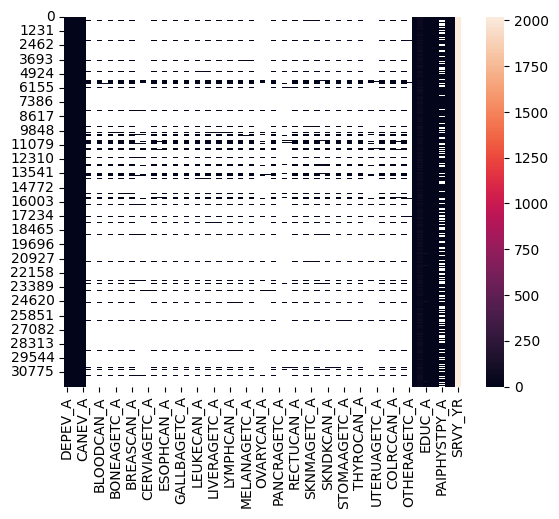

In [8]:
sns.heatmap(df)

In [12]:
years = [19, 20, 21, 22, 23]
final_df = pd.DataFrame(columns = columns)
for year in years:
  path = f"adult{year}.csv"
  print(path)
  df = pd.read_csv(path)
  df_columns = list(df.columns)
  for col in columns:
    if col not in df_columns:
      df[col] = np.nan
  df = df[columns]
  final_df = pd.concat([final_df, df], ignore_index = True)

adult19.csv


<ipython-input-12-4254680926>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, df], ignore_index = True)


adult20.csv
adult21.csv
adult22.csv
adult23.csv


In [15]:
# save the data to the disk
final_df.to_csv("combined_df.csv", index = False)